<a href="https://colab.research.google.com/github/MelikeBadem/Forecast-WeatherML/blob/main/forecastML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Veri dosyasını yükleme
df = pd.read_csv("guncellenmis_hava_durumu.csv")

# Özellik ve hedef ayrımı
X = df.drop(["Sıcaklık", "Tarih", "Hava Durumu Özeti", "Zaman Dilimi", "Non-Night"], axis=1)  # Hedef değişken dışındaki sütunlar
y = df["Sıcaklık"]

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Linear Regression Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("\nLinear Regression Model")
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print(f"Modelin Doğruluğu (R²): {r2_linear * 100:.2f}%")



Linear Regression Model
Mean Squared Error (MSE): 1.9484775727764185
Mean Absolute Error (MAE): 1.0349981558962869
Modelin Doğruluğu (R²): 96.98%


In [28]:
# Random Forest Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Model")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print(f"Modelin Doğruluğu (R²): {r2_rf * 100:.2f}%")


Random Forest Model
Mean Squared Error (MSE): 1.3103309399109044
Mean Absolute Error (MAE): 0.7573670018317521
Modelin Doğruluğu (R²): 97.97%


In [29]:
from sklearn.linear_model import PassiveAggressiveRegressor

# Passive Aggressive Regressor modeli
pa_model = PassiveAggressiveRegressor(max_iter=100, random_state=42, tol=1e-3)
pa_model.fit(X_train, y_train)
y_pred_pa = pa_model.predict(X_test)

# Performans ölçümleri
mse_pa = mean_squared_error(y_test, y_pred_pa)
mae_pa = mean_absolute_error(y_test, y_pred_pa)
r2_pa = r2_score(y_test, y_pred_pa)

print("\nPassive Aggressive Regression Model")
print("Mean Squared Error (MSE):", mse_pa)
print("Mean Absolute Error (MAE):", mae_pa)
print(f"Modelin Doğruluğu (R²): {r2_pa * 100:.2f}%")



Passive Aggressive Regression Model
Mean Squared Error (MSE): 3.2743869151153455
Mean Absolute Error (MAE): 1.5084902697222022
Modelin Doğruluğu (R²): 94.92%


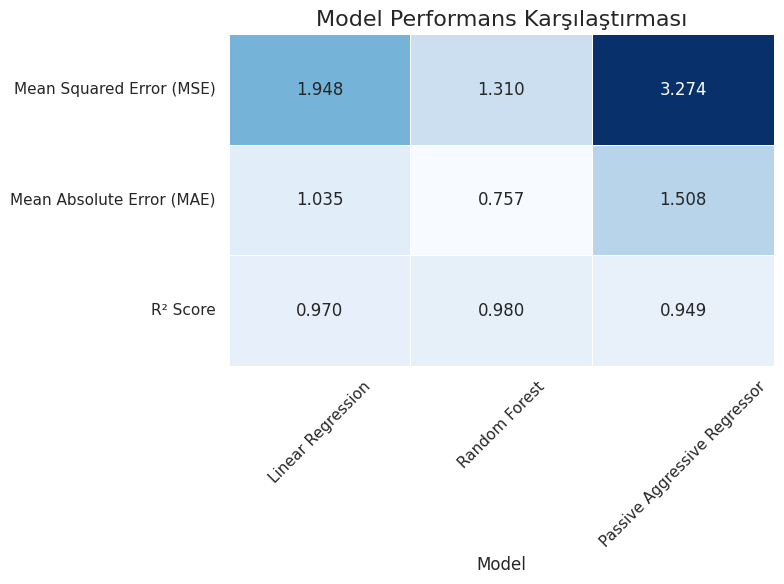

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model performans metriklerini içeren bir sözlük oluşturuyoruz
model_performance = {
    "Model": ["Linear Regression", "Random Forest", "Passive Aggressive Regressor"],
    "Mean Squared Error (MSE)": [mse_linear, mse_rf, mse_pa],
    "Mean Absolute Error (MAE)": [mae_linear, mae_rf, mae_pa],
    "R² Score": [r2_linear, r2_rf, r2_pa]
}

# Pandas DataFrame'e dönüştür
performance_df = pd.DataFrame(model_performance)

# DataFrame'i transpoz (ters) ediyoruz, böylece metrikler sütunlarda, modeller ise satırlarda olacak
performance_df = performance_df.set_index("Model").T

# Görselleştirme için stil ayarları
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Tabloyu oluşturuyoruz
ax = sns.heatmap(performance_df, annot=True, cmap="Blues", fmt=".3f", cbar=False, linewidths=0.5)

# Başlık ve eksen ayarları
plt.title("Model Performans Karşılaştırması", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Tabloyu görsel olarak kaydediyoruz
plt.tight_layout()
plt.show()
